##### Getting the required libraries for data analysis

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

##### Reading the data set and displaying some basic information related to it

In [56]:
dataset = pd.read_csv('McDonalds Menu.csv')  # read the data set

In [57]:
dataset.sample(5)  # show 5 random rows

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
98,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,220,24.0,37,3.5,17,0.0,...,67,22,5,22,0,6,0,70,2,8
237,Smoothies & Shakes,Strawberry Banana Smoothie (Large),22 fl oz cup,330,10,1.0,2,0.5,3,0.0,...,74,25,4,16,70,5,0,45,10,4
185,Coffee & Tea,Caramel Mocha (Medium),16 fl oz cup,390,120,14.0,21,8.0,40,0.5,...,55,18,1,4,50,12,15,0,40,2
245,Smoothies & Shakes,Strawberry Shake (Medium),16 fl oz cup,690,180,20.0,30,13.0,63,1.0,...,114,38,0,0,100,15,25,0,50,0
77,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Grilled Ch...,10.3 oz (291 g),380,90,10.0,15,3.0,14,0.0,...,47,16,3,13,12,27,60,15,8,20


In [58]:
dataset.info()  # show the information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [59]:
eatables = dataset[~dataset['Category'].isin(['Beverages', 'Coffee & Tea', 'Smoothies & Shakes'])]

In [60]:
eatables['Serving Size'] = eatables['Serving Size'].str.split('(', expand=True)[1].str.split('g', expand=True)[0].astype(float)
eatables['Serving Size']

C:\Users\Sohaib\AppData\Local\Temp/ipykernel_8540/1519329905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eatables['Serving Size'] = eatables['Serving Size'].str.split('(', expand=True)[1].str.split('g', expand=True)[0].astype(float)


0      136.0
1      135.0
2      111.0
3      161.0
4      161.0
       ...  
105     33.0
106     29.0
107    179.0
108    182.0
109    178.0
Name: Serving Size, Length: 110, dtype: float64

In [61]:
# add a new column for calorie density of each non-drink item
eatables['Calorie Density'] = eatables['Calories'] / eatables['Serving Size']
# show calorie density column
eatables['Calorie Density']

C:\Users\Sohaib\AppData\Local\Temp/ipykernel_8540/951099797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eatables['Calorie Density'] = eatables['Calories'] / eatables['Serving Size']


0      2.205882
1      1.851852
2      3.333333
3      2.795031
4      2.484472
         ...   
105    4.545455
106    1.551724
107    1.843575
108    1.868132
109    1.573034
Name: Calorie Density, Length: 110, dtype: float64

In [62]:
# show Item column for top 3 items by calorie density for each Category
most_calorie_dense = eatables.sort_values(by=["Category", 'Calorie Density'], ascending=[True, False]).groupby('Category')[["Item", "Calorie Density", "Category"]].head(3)
most_calorie_dense

,Item,Calorie Density,Category
53,Bacon McDouble,2.732919,Beef & Pork
55,Jalapeño Double,2.704403,Beef & Pork
50,Double Cheeseburger,2.670807,Beef & Pork
39,Cinnamon Melts,4.035088,Breakfast
10,Sausage Biscuit (Regular Biscuit),3.675214,Breakfast
11,Sausage Biscuit (Large Biscuit),3.664122,Breakfast
78,Chicken McNuggets (4 piece),2.923077,Chicken & Fish
81,Chicken McNuggets (20 piece),2.910217,Chicken & Fish
82,Chicken McNuggets (40 piece),2.910217,Chicken & Fish
104,Chocolate Chip Cookie,4.848485,Desserts


In [63]:
# show Item column for bottom 3 items by calorie density for each Category
least_calorie_dense = eatables.sort_values(by=["Category", 'Calorie Density'], ascending=[True, True]).groupby('Category')[["Item", "Calorie Density", "Category"]].head(3)
least_calorie_dense

,Item,Calorie Density,Category
46,Quarter Pounder Deluxe,2.213115,Beef & Pork
54,Daily Double,2.263158,Beef & Pork
56,McRib,2.403846,Beef & Pork
41,Fruit & Maple Oatmeal without Brown Sugar,1.035857,Breakfast
40,Fruit & Maple Oatmeal,1.155378,Breakfast
1,Egg White Delight,1.851852,Breakfast
77,Premium McWrap Chicken Sweet Chili (Grilled Ch...,1.305842,Chicken & Fish
73,Premium McWrap Chicken & Ranch (Grilled Chicken),1.515152,Chicken & Fish
71,Premium McWrap Chicken & Bacon (Grilled Chicken),1.589404,Chicken & Fish
106,Kids Ice Cream Cone,1.551724,Desserts


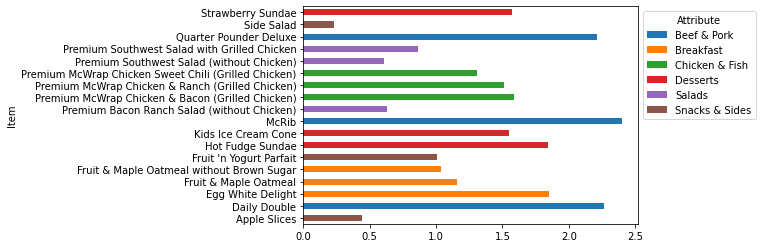

In [46]:
# plot most_calorie_dense Item, category and calorie density with each Category bar colored according to Category
# most_calorie_dense.plot(kind='bar', x='Category', y='Calorie Density', color='Category')

pivoted = least_calorie_dense.pivot(index='Item', columns='Category', values='Calorie Density')


ax = pivoted.plot(kind='barh', stacked=True) 
ax.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')

#  x = most_calorie_dense.plot(kind='barh', title='Bar Chart of Colors', figsize=(6, 4))
# x.set(xlabel='Items')
# x.legend(title='Attribute', bbox_to_anchor=(1, 1), loc='upper left')
# x.grid(axis='x')



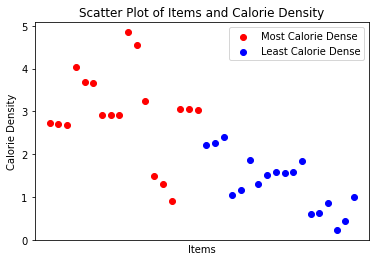

In [53]:
plt.scatter(most_calorie_dense['Item'], most_calorie_dense['Calorie Density'], color='red')
plt.scatter(least_calorie_dense['Item'], least_calorie_dense['Calorie Density'], color='blue')
plt.xticks([])
plt.xlabel('Items')
plt.ylabel('Calorie Density')
plt.title('Scatter Plot of Items and Calorie Density')
plt.legend(['Most Calorie Dense', 'Least Calorie Dense'])
plt.show()